# Hyperparameter Tuning for Sentiment Analysis with Kernel SVM

This notebook demonstrates hyperparameter optimization for a Kernel SVM model to perform sentiment analysis. We'll track experiments with MLflow and find the best model configuration.

## Setup and Imports

In [1]:
import numpy as np
import mlflow
import pandas as pd

import sys
sys.path.append('..')
from src.models.train_models import ModelTrainer
from src.models.predict_models import ModelPredictor
from src.config import *

## Define Hyperparameter Grid

We'll create a grid of hyperparameters to search through:

- **C values**: Regularization strength (inverse) - smaller values specify stronger regularization
- **Kernel types**: Different kernel functions for the SVM
- **Gamma values**: Kernel coefficient for RBF, polynomial and sigmoid kernels

In [2]:
# Define hyperparameter grids to search
C_values = [0.1, 1.0, 10.0]
kernel_values = ['rbf', 'linear', 'poly', 'sigmoid']
gamma_values = ['scale', 'auto', 0.1, 1.0]

## Hyperparameter Grid Search

Now we'll run through all valid combinations of hyperparameters and track the results using MLflow.

In [3]:
results = []

for c in C_values:
    for kernel in kernel_values:
        for gamma in gamma_values:
            print(f"Training with C={c}, Kernel={kernel}, Gamma={gamma}")
            try:
                run_id = ModelTrainer.kernel_svm(C=c, kernel=kernel, gamma=gamma)

                with mlflow.start_run(run_id=run_id):
                    run = mlflow.get_run(run_id)
                    metrics = run.data.metrics
                    params = run.data.params

                    results.append({
                        'run_id': run_id,
                        'C': params.get('C'),
                        'kernel': params.get('kernel'),
                        'gamma': params.get('gamma'),
                        'train_accuracy': metrics.get('train_accuracy'),
                        'test_accuracy': metrics.get('test_accuracy'),
                        'test_precision': metrics.get('test_precision'),
                        'test_recall': metrics.get('test_recall'),
                        'test_f1': metrics.get('test_f1'),
                    })
            except Exception as e:
                print(f"Error training with C={c}, Kernel={kernel}, Gamma={gamma}: {e}")
                continue

Training with C=0.1, Kernel=rbf, Gamma=scale
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


d:\Tailieudh\ML\Project\ml-course-shibainu\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Training with C=0.1, Kernel=rbf, Gamma=auto
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=rbf, Gamma=0.1
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=rbf, Gamma=1.0
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=linear, Gamma=scale
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=linear, Gamma=auto
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=linear, Gamma=0.1
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=linear, Gamma=1.0
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=poly, Gamma=scale
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=poly, Gamma=auto
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=poly, Gamma=0.1
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=poly, Gamma=1.0
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=sigmoid, Gamma=scale
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=sigmoid, Gamma=auto
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=sigmoid, Gamma=0.1
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=0.1, Kernel=sigmoid, Gamma=1.0
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=rbf, Gamma=scale
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=rbf, Gamma=auto
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=rbf, Gamma=0.1
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=rbf, Gamma=1.0
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=linear, Gamma=scale
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=linear, Gamma=auto
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=linear, Gamma=0.1
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=linear, Gamma=1.0
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=poly, Gamma=scale
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=poly, Gamma=auto
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=poly, Gamma=0.1
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=poly, Gamma=1.0
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=sigmoid, Gamma=scale
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=sigmoid, Gamma=auto
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=sigmoid, Gamma=0.1
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=1.0, Kernel=sigmoid, Gamma=1.0
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=rbf, Gamma=scale
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=rbf, Gamma=auto
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=rbf, Gamma=0.1
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=rbf, Gamma=1.0
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=linear, Gamma=scale
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=linear, Gamma=auto
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=linear, Gamma=0.1
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=linear, Gamma=1.0
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=poly, Gamma=scale
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=poly, Gamma=auto
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=poly, Gamma=0.1
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=poly, Gamma=1.0
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=sigmoid, Gamma=scale
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=sigmoid, Gamma=auto
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=sigmoid, Gamma=0.1
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


Training with C=10.0, Kernel=sigmoid, Gamma=1.0
Using active MLflow experiment 'sentiment_classification' with ID 360311621043028179


## Print All Model Test Accuracies

Let's display the test accuracies for all models, sorted by performance.


All Models Test Accuracies (sorted):

   C  kernel gamma  test_accuracy
10.0     rbf scale       0.884731
10.0     rbf   1.0       0.884731
 1.0  linear   0.1       0.882984
 1.0  linear scale       0.882984
10.0 sigmoid   0.1       0.882984
 1.0  linear   1.0       0.882984
 1.0  linear  auto       0.882984
 1.0     rbf   1.0       0.879491
 1.0     rbf scale       0.879491
 1.0 sigmoid   1.0       0.877246
10.0     rbf   0.1       0.877246
 1.0 sigmoid scale       0.877246
10.0  linear   0.1       0.860279
10.0  linear  auto       0.860279
10.0  linear   1.0       0.860279
10.0  linear scale       0.860279
10.0 sigmoid   1.0       0.856537
10.0 sigmoid scale       0.854042
 1.0     rbf   0.1       0.837076
10.0    poly   1.0       0.808882
10.0    poly scale       0.808882
 1.0    poly scale       0.796657
 1.0    poly   1.0       0.796158
 1.0 sigmoid   0.1       0.791916
 0.1  linear scale       0.791916
 0.1  linear  auto       0.791916
 0.1  linear   0.1       0.791916
 0.1  lin

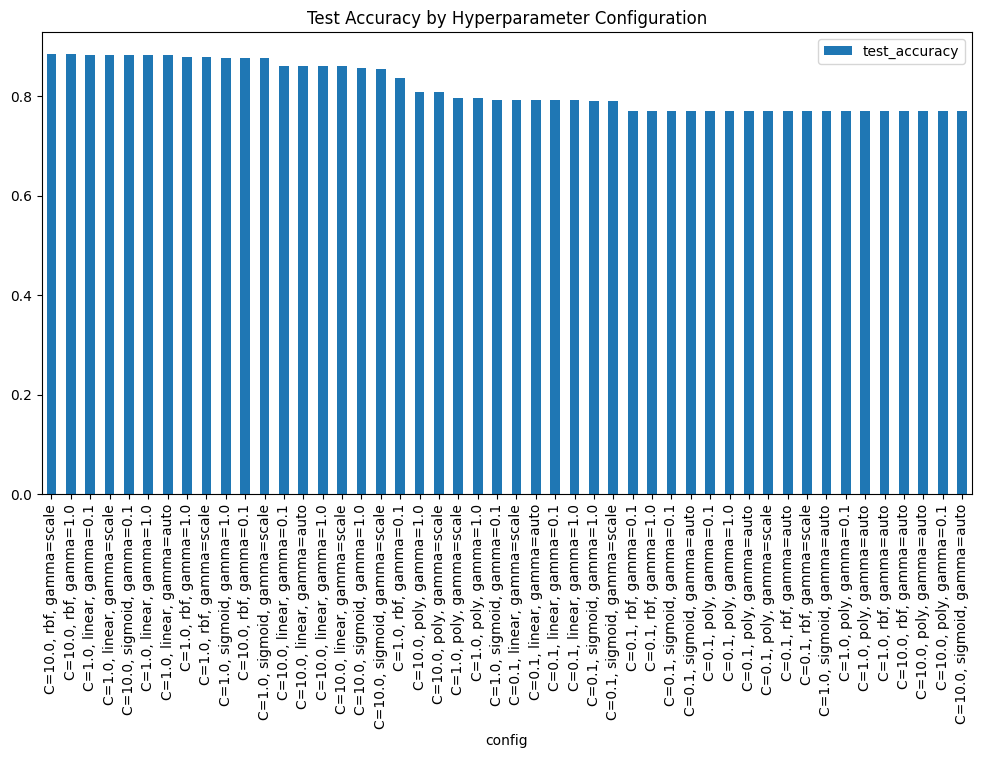

In [4]:
# Create dataframe from results
results_df = pd.DataFrame(results)

# Print all model test accuracies, sorted from best to worst
if not results_df.empty and 'test_accuracy' in results_df.columns:
    sorted_results = results_df.sort_values('test_accuracy', ascending=False)
    
    print("\nAll Models Test Accuracies (sorted):\n")
    print(sorted_results[['C', 'kernel', 'gamma', 'test_accuracy']].to_string(index=False))
    
    # Create a combined label for each configuration
    sorted_results['config'] = sorted_results.apply(
        lambda row: f"C={row['C']}, {row['kernel']}, gamma={row['gamma']}", axis=1)
    
    # Plot with the combined label
    sorted_results.plot(
        kind='bar', x='config', y='test_accuracy', figsize=(12, 6),
        title='Test Accuracy by Hyperparameter Configuration'
    )
else:
    print("\nNo successful model runs found with test_accuracy metric.")

## Analyzing Results and Finding the Best Model

In [5]:
# Find the best model
if not results_df.empty and 'test_accuracy' in results_df.columns:
    best_model = results_df.loc[results_df['test_accuracy'].idxmax()]
    best_run_id = best_model['run_id']
    
    print("\nBest model:")
    print(f"C: {best_model['C']}, Kernel: {best_model['kernel']}, Gamma: {best_model['gamma']}")
    
    # Print test metrics
    print(f"Test Accuracy: {best_model['test_accuracy']:.4f}")
    
    # Check and print other test metrics if they exist
    for metric in ['test_f1', 'test_precision', 'test_recall']:
        if metric in best_model:
            print(f"{metric.replace('_', ' ').title()}: {best_model[metric]:.4f}")
    
    # Print train metrics
    if 'train_accuracy' in best_model:
        print(f"Train Accuracy: {best_model['train_accuracy']:.4f}")
    
    # Check and print other train metrics if they exist
    for metric in ['train_f1', 'train_precision', 'train_recall']:
        if metric in best_model:
            print(f"{metric.replace('_', ' ').title()}: {best_model[metric]:.4f}")
    
    print(f"Run ID: {best_run_id}")
else:
    print("\nNo successful model runs found with test_accuracy metric.")
    best_run_id = None


Best model:
C: 10.0, Kernel: rbf, Gamma: scale
Test Accuracy: 0.8847
Test F1: 0.8786
Test Precision: 0.8811
Test Recall: 0.8847
Train Accuracy: 1.0000
Run ID: 2d484502647b47bba90a48ea084ffb9e


## Making Predictions with the Best Model

In [6]:
if best_run_id is not None:
    # Prediction with the best model found
    texts = np.array(["This product works great!", "Terrible experience..."])
    predictions = ModelPredictor.predict(best_run_id, texts)

    print(f"\nPredictions with Best Model (Run ID: {best_run_id[:8]}...):\n")
    for text, pred in zip(texts, predictions):
        sentiment = "Positive" if pred == 1 else "Negative"
        print(f"'{text}' -> {sentiment}")


Predictions with Best Model (Run ID: 2d484502...):

'This product works great!' -> Positive
'Terrible experience...' -> Negative
